In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_wine
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, \
normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

make_blobs is one way to create a synthetic dataset that is suitable for practicing KMeans

In [25]:
#wine dataset is not the same as wine quality dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

X = data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## KMeans

In [26]:
#without scaling
model = KMeans(n_clusters=3, random_state=1)
data['cluster'] = model.fit_predict(X)

data.head()

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
#with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=3, random_state=1)
data['cluster_scaled'] = model.fit_predict(X_scaled)

data.head()

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster,cluster_scaled
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2


## Evaluation

Clustering evaluation is not like classification. It doesn't have a single correct answer, so the evaluation focuses on:
- is the clustering meaningful?
- is it stable and interpretable?
- does it align with known structure (if available)?
We typically evaluate clustering in three layers

### Layer 1: Internal Evaluation
#### Silhouette Score
It measures how well each point fit inside its cluster compared to other cluster
- range -1 to 1
- higher = better
- around 0.4 - 0.6 is already decent

In [28]:
score1 = silhouette_score(X, data['cluster'])
score2 = silhouette_score(X_scaled, data['cluster_scaled'])

print(score1, score2)

0.5595823138217512 0.260098931017933


#### Davies-Bouldin Index
Lower is better

In [29]:
score1 = davies_bouldin_score(X, data['cluster'])
score2 = davies_bouldin_score(X_scaled, data['cluster_scaled'])

print(score1, score2)

0.5495673136901164 1.496755448822744


based on this internal evaluation, we can actually see that the raw data has better score than the scaled one. This is actually pretty reasonable because the data itself isn't really far apart to begin with. When we use raw data, there are some big value which got better separated as is, thus the high score, while when it got scaled, most of the data overlaps.

### Layer 2: External evaluation (Wine dataset has labels)
Wine dataset has target variable, we didn't use it
#### Adjusted Rand Index (ARI)
ARI measures similarity between two clustering by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clustering. Kind of like accuracy score in classification problem.

1 is perfect match while 0 is random clustering. Negative is worse than random.

High ARI is nice but low ARI doesn't mean failure

In [31]:
ari1 = adjusted_rand_score(wine.target, data['cluster'])
ari2 = adjusted_rand_score(wine.target, data['cluster_scaled'])

print(ari1, ari2)

0.3517721516862617 0.9148795960669529


#### Normalized Mutual Information (NMI)
NMI is a measure of the similarity between two labels of the same data. 0 indicates no mutual information while 1 is perfect correlation. This measure is not adjusted for chance, therefore adjusted mutual information might be preferred.

In [36]:
nmi1 = normalized_mutual_info_score(wine.target, data['cluster'])
nmi2 = normalized_mutual_info_score(wine.target, data['cluster_scaled'])

print(nmi1, nmi2)

0.423309269344735 0.8925851652969188


based on these metrics we can actually see that the scaled data has better score because it is almost identical to the actual target variable.

### Layer 3: Interpratability
#### Cluster Size

In [38]:
data['cluster'].value_counts()

cluster
1    102
0     49
2     27
Name: count, dtype: int64

In [40]:
data['cluster_scaled'].value_counts()

cluster_scaled
0    66
2    61
1    51
Name: count, dtype: int64

raw data clusters resulted in bias towards a certain cluster, while the scaled one is more even

#### Feature means per cluster

In [41]:
cluster_profile = data.groupby('cluster').mean()
cluster_profile

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_scaled
cluster,,,,,,,,,,,,,,
0,13.369184,2.400000,2.392653,18.514286,109.081633,2.441633,2.213673,0.325510,1.706735,5.188367,0.959714,2.847959,906.346939,1.571429
1,12.598529,2.453431,2.321863,20.646078,93.696078,2.053627,1.647549,0.395980,1.425098,4.673333,0.917843,2.394804,521.558824,0.411765
2,13.850741,1.778519,2.487778,16.925926,105.629630,2.941481,3.136667,0.298889,2.007037,6.275185,1.102963,3.002222,1308.777778,2.000000


In [42]:
cluster_profile = data.groupby('cluster_scaled').mean()
cluster_profile

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
cluster_scaled,,,,,,,,,,,,,,
0,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848,0.924242
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.784314
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.901639


We can see the numerical summary of the features. For example, cluster 2 contains higher alcohol than cluster 0

#### Compare clustes vs true classes

In [43]:
pd.crosstab(data['cluster_scaled'],wine.target)

col_0,0,1,2
cluster_scaled,,,
0,0,66,0
1,0,3,48
2,59,2,0


In [44]:
pd.crosstab(data['cluster'],wine.target)

col_0,0,1,2
cluster,,,
0,31,7,11
1,1,64,37
2,27,0,0


Even though the actual class numbers isn't aligned with the clusters, we can roughly see that scaled data resulted in clusters closer to the actual value than the raw data cluster. This further shows the scaled data clustering is better than the raw data, and it is actually closer to a classification problem.

### Choosing number of clusters
This step is supposed to be the first thing we should do before doing any clustering. However, this does not needed for DBSCAN

#### Elbow Method
Elbow method is a heuristic method for choosing the optimal number of K. The optimal number of K will be where a "bend" occured. It indicates adding more clusters yields diminishing return

In [56]:
inertia = []
K = range(2,11)

for k in K:
    km = KMeans(n_clusters = k, random_state=2)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

inertia_ is sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

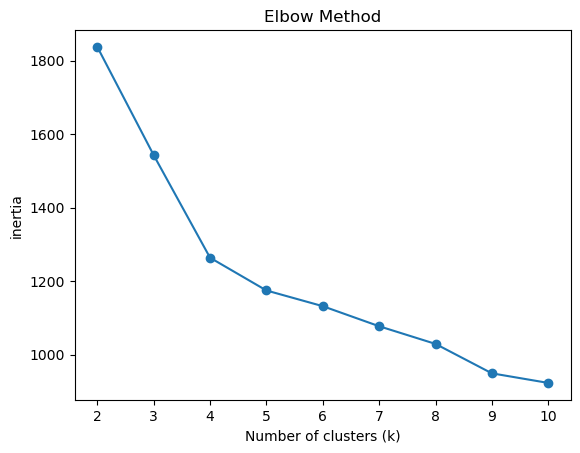

In [59]:
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

#### Silhouette Method
Silhouette analysis measure how close each point in one cluster is to points in the neighboring clusters. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong clusters.

In [60]:
scores = []

for k in K:
    km = KMeans(n_clusters = k, random_state=2)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

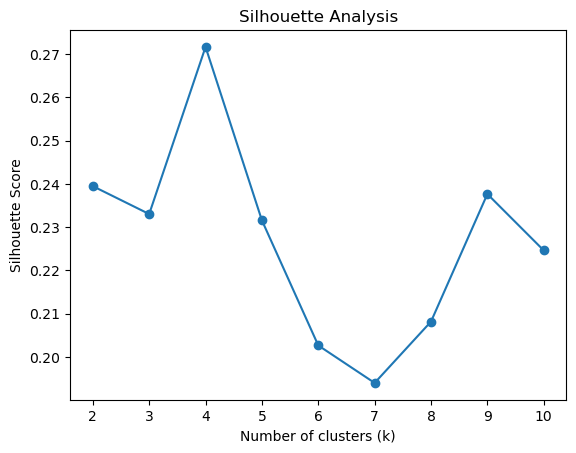

In [62]:
plt.plot(K, scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

From the two method, it is actually better to group the data into 4 clusters rather than 3.

## KMeans 4 Cluster

In [63]:
model = KMeans(n_clusters = 4, random_state=1)
data['cluster_4'] = model.fit_predict(X_scaled)

data.head()

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster,cluster_scaled,cluster_4
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,2,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,2,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2,0


In [64]:
data['cluster_4'].value_counts()

cluster_4
3    63
1    51
0    37
2    27
Name: count, dtype: int64

In [67]:
print('Sil_Score', silhouette_score(X_scaled, data['cluster_4']))

Sil_Score 0.27227426710927866


In [68]:
print('Davies Score', davies_bouldin_score(X_scaled, data['cluster_4']))

Davies Score 1.4002107908712815


Even though we use the optimal numnber of clusters, the score doesn't increase significantly. We can see that instead of grouping it evenly, the model only split one of the cluster into two clusters. This does improve the score slightly but it is more of a metric sensitivity not really a better structure

## Summary

While K-Means achieved high alignment with known wine classes (ARI & NMI), internal validation metrics such as silhouette score and davies bouldin remain moderate. This indicates that although the clusters correspond well to class labels, the underlying cluster geometry is not perfectly compact or spherical. Feature scaling improved alignment with true labels at the cost of reduced cluster compactness, highlighting trade off between internal and external objectives.

While the optimal number of clusters is 4, obtain from elbow and silhouette method, the internal validation metric improvement was marginal. This only resulted in over-segmentation, where one cluster got split into two fragments instead of an even grouping for all, and it doesn't give additional interpretive value. The chosen number of K is 3 clusters.